# Check CICE issue with Sinz, Tinz
https://github.com/COSIMA/cice5/issues/62

In [14]:
%matplotlib inline
import cosima_cookbook as cc
from cosima_cookbook import explore
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
from matplotlib import cm
import os.path
import glob

In [2]:
import climtas.nci
climtas.nci.GadiClient(malloc_trim_threshold='64kib')

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/8787/status,
Dashboard: /proxy/8787/status,Workers: 27
Total threads: 27,Total memory: 108.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:34221,Workers: 27
Dashboard: /proxy/8787/status,Total threads: 27
Started: Just now,Total memory: 108.00 GiB
Comm: tcp://10.6.121.6:35359,Total threads: 1
Dashboard: /proxy/42545/status,Memory: 4.00 GiB
Nanny: tcp://127.0.0.1:43297,


In [3]:
session = cc.database.create_session()

In [4]:
dbx = explore.DatabaseExplorer(session=session)
dbx

DatabaseExplorer(children=(HTML(value='<style>.header p{ line-height: 1.4; margin-bottom: 10px }</style>\n    …

In [10]:
sinz = cc.querying.getvar('01deg_jra55v140_iaf_cycle3', 'Sinz_m', session, n=-1)

In [11]:
sinz

<xarray.DataArray 'Sinz_m' (time: 1, nc: 5, nkice: 4, nj: 2700, ni: 3600)>
dask.array<open_dataset-8221090429c512cbb95edba0f9f7a68eSinz_m, shape=(1, 5, 4, 2700, 3600), dtype=float32, chunksize=(1, 1, 1, 270, 360), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2019-01-01
    TLON     (nj, ni) float32 dask.array<chunksize=(270, 360), meta=np.ndarray>
    TLAT     (nj, ni) float32 dask.array<chunksize=(270, 360), meta=np.ndarray>
    ULON     (nj, ni) float32 dask.array<chunksize=(270, 360), meta=np.ndarray>
    ULAT     (nj, ni) float32 dask.array<chunksize=(270, 360), meta=np.ndarray>
    NCAT     (nc) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    VGRDi    (nkice) float32 dask.array<chunksize=(1,), meta=np.ndarray>
Dimensions without coordinates: nc, nkice, nj, ni
Attributes:
    units:          ppt
    long_name:      ice internal bulk salinity
    cell_measures:  area: tarea
    cell_methods:   time: mean
    time_rep:       averaged
    time_bounds:    <xarray.DataArray 'time_bounds' (time: 1, d2: 2)>\ndask.a...
    ncfiles:        ['/g/data/cj50/access-om2/raw-output/access-om2-01/01deg_...
    contact:        Andrew Kiss
    email:          andrew.kiss@anu.edu.au
    created:        2020-11-11
    description:    0.1 degree ACCESS-OM2 global model configuration under in...
    notes:          Run configuration and history: https://github.com/COSIMA/...

In [12]:
sinz.shape

(1, 5, 4, 2700, 3600)

In [24]:
sinz.isel(time=0,ni=0,nj=490).values

array([[8.907124 , 6.9726076, 5.9118047, 5.959202 ],
       [6.79212  , 7.201125 , 4.9755616, 4.467157 ],
       [4.8251762, 5.4950786, 6.034988 , 3.9300387],
       [3.7013698, 4.092709 , 4.8782053, 5.274409 ],
       [3.4740565, 3.3992057, 3.994407 , 5.3925915]], dtype=float32)

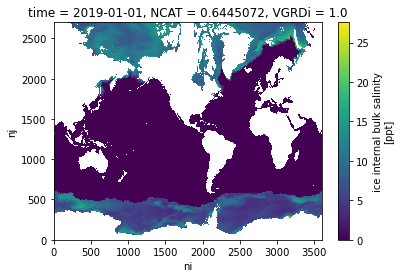

In [21]:
sinz.isel(time=0,nc=0,nkice=0).plot()

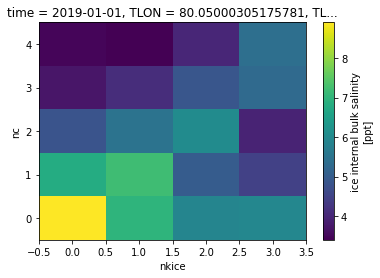

In [32]:
sinz.isel(time=0,ni=0,nj=490).plot()

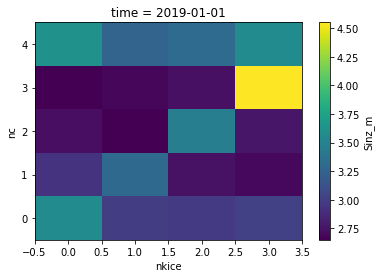

In [35]:
sinz.isel(time=0).mean('ni').mean('nj').plot()

In [37]:
ds = xr.open_dataset('/home/548/sxa548/access-om2-sample_output/iceh.2018-08-15.nc')
badsinz = ds['Sinz']
badvicen = ds['vicen']

In [26]:
badsinz.isel(time=0,ni=30,nj=40).values

array([[0.64920187, 0.64920187, 0.64920187, 0.64920187],
       [0.64920187, 2.354581  , 2.354581  , 2.354581  ],
       [2.354581  , 2.354581  , 3.0310922 , 3.0310922 ],
       [3.0310922 , 3.0310922 , 3.0310922 , 3.1892977 ],
       [3.1892977 , 3.1892977 , 3.1892977 , 3.1892977 ]], dtype=float32)

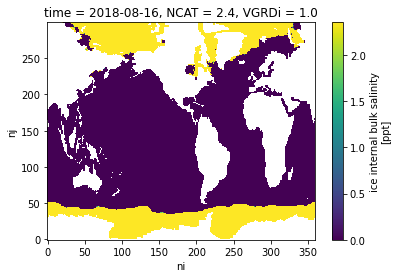

In [29]:
badsinz.isel(time=0,nc=2,nkice=0).plot()

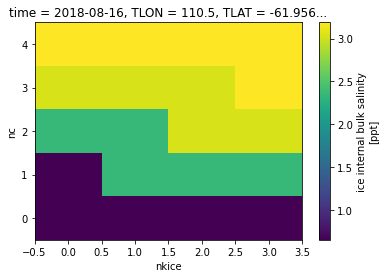

In [31]:
badsinz.isel(time=0,ni=30,nj=40).plot()

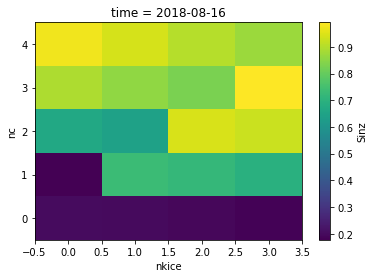

In [36]:
badsinz.isel(time=0).mean('ni').mean('nj').plot()